*What is Ray?*

Ray is a unified framework for scaling Python and AI applications. It has a core framework, and a toolkit of libraries to manage AI workloads, and to run Python codes in a distributed manner to speed up code execution. 


*What are the Ray's libraries?*

Ray Core: Scale General Python Applications

Ray AIR: Scale AI Applications

Ray Datasets: Scale data ingest and preprocessing

Ray Train: Scale machine learning training

Ray Tune: Scale hyperparameter tuning

Ray Serve: Scale model serving

Ray RLlib: Scale reinforcement learning

There are also other Ray libraries such as Ray Workflows, Distributed multiprocessing.Pool, and so on. 

In [1]:
# Before we could use ray in our Python code, we would need to install it like so:
!pip install ray

# After installation, we will import ray into our code like so:
import ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*Difference between a Ray remote function vs a Regular Python function*

In [2]:
# A regular Python function looks like this
def do_something(x):
  return x

# A Ray remote function looks like this
@ray.remote
def do_something(x):
  return x

To call the remote function, we will have to use .remote like this:
do_something("x").remote()

To turn a regular Python function into a Ray function, we simply put "@ray.remote" annotation above a regular Python function, as shown like the code above. 

*Why do we turn a regular Python function into a Ray function?*

We use Ray function because it can be executed in a Ray cluster asynchronously. This is to allow a function to be called in an asynchronous manner, from a remote Ray cluster, which can help setting up a distributed system in such a way that functions can be run in a distributed manner, speeding up the processing of big data. 

Before we annotate a function to turn it into a Ray function, we first need to initiate a Ray service using ray.init(). 

Otherwise, Ray remote functions won't work.

In [3]:
# Stopping a Ray instance / service in case one is already running
ray.shutdown()


# Starting a Ray instance / service on a single machine
ray.init()

2022-12-16 09:36:04,383	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.16
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


ray.init() can only be called once and cannot be called twice. To shut it down, call ray.shutdown():

In [4]:
# Shutting down a Ray service. 
ray.shutdown()

*A simple example of using Ray function in Python code*

In [5]:
# Import ray into our Python code
import ray
import time

# If there's a Ray instance already running, shut it down first
ray.shutdown()

# Initialize a Ray instance / service 
ray.init()

# Annotate a function so it becomes a Ray remote function
@ray.remote
def sleep_function(i):
  time.sleep(1)
  return i

# Recording the starting time
start_time = time.time()

time_index = [sleep_function.remote(i) for i in range(4)]

# Print the time it takes for the Ray remote function to execute
execution_time_ray = time.time() - start_time
print(execution_time_ray)

# Printing the output of ray.get, which returns an object or list of objects from the object ID or list of object IDs obtained from the .remote function
# ray.get is a synchronous function (it will block other function from executing until the corresponding object is available or all the objects in the list are available)
print(ray.get(time_index))

2022-12-16 09:36:12,255	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


0.19228267669677734
[0, 1, 2, 3]


In comparison, the same Python program without using Ray would look like this:

In [6]:
import time

def sleep_function(i):
  time.sleep(1)
  return i

# Recording the starting time
start_time = time.time()

time_index = [sleep_function(i) for i in range(4)]

# Print the time it takes for the Ray remote function to execute
execution_time_regular = time.time() - start_time
print(execution_time_regular)

print(time_index)

4.004140138626099
[0, 1, 2, 3]


The difference in execution time is significant. 

In my test run, the execution time of the regular Python code without Ray is 4.008

Whereas the execution time with Ray is 0.015

This is because the regular Python code's execution is running the for loop sequentially, therefore the time of execution stacks up with each function call in the for loop. 

Whereas the Ray's code execution, each remote function in the for loop is able to start running remotely in a Ray local instance asynchronously without needing to wait for the previous function call to finish. 

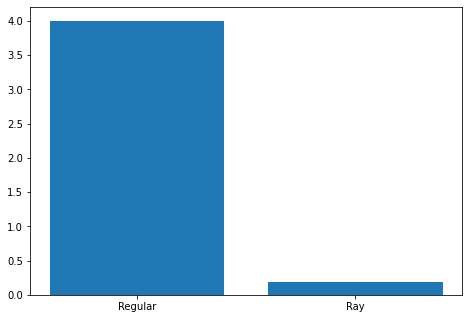

In [7]:
# Execution time visualization

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
with_or_without_ray = ['Regular', 'Ray']
execution_time = [execution_time_regular, execution_time_ray]
ax.bar(with_or_without_ray,execution_time)
plt.show()

*What is a Ray Cluster?*
In the simple example above, we run the code with Ray in just a single Ray instance / local service, without using a Ray Cluster. 

However, if we would like to scale the code to handle a larger workload, we can create a Ray Cluster. 

A Ray Cluster is a number of worker nodes that has a common head node. A Ray Cluster with multiple worker nodes enable a Python program to distribute its workload to the worker nodes, and each worker node will handle a different part of a computation asynchronously. 

After the worker nodes process different parts of a large workload, the output of the different parts will be coordinated and combined in a head node, allowing computations or workloads to be handled in a distributed manner. 

A Ray Cluster can be either fixed in size, or can be scaled up automatically, depending on its configuration. 

Usually, a Ray Cluster is deployed on a platform that supports it, like AWS, or Kubernetes.

A Ray Cluster can be initialized by calling 
ray up cluster.yaml

A cluster.yaml file can look like this:

In [8]:
#cluster_name: str
#max_workers: int
#upscaling_speed: float
#idle_timeout_minutes: int
#docker:
#    docker
#provider:
#    provider
#auth:
#    auth
#available_node_types:
#    node_types
#head_node_type: str
#file_mounts:
#    file_mounts
#cluster_synced_files:
#    - str
#rsync_exclude:
#    - str
#rsync_filter:
#    - str
#initialization_commands:
#    - str
#setup_commands:
#    - str
#head_setup_commands:
#    - str
#worker_setup_commands:
#    - str
#head_start_ray_commands:
#    - str
#worker_start_ray_commands:
#    - str

*How to check Ray Cluster's resource(s)?*

After initializing a Ray instance / service, we can check what type of resource(s) are available by calling .cluster_resources()

In [9]:
from pprint import pprint
import ray

# Shut down any existing ray instance if there is one
ray.shutdown()

# Initialize Ray instance
ray.init()

# Check instance resource(s)
pprint(ray.cluster_resources())

2022-12-16 09:36:25,872	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


{'CPU': 2.0,
 'GPU': 1.0,
 'accelerator_type:T4': 1.0,
 'memory': 7936126158.0,
 'node:172.28.0.12': 1.0,
 'object_store_memory': 3968063078.0}


An example output of a ray.cluster_resources() without GPU can look like this:

{
 
 'CPU': 2.0,

 'memory': 7977271296.0,

 'node:172.28.0.12': 1.0,

 'object_store_memory': 3988635648.0
 
 }

An example output of a ray.cluster_resources() with GPU can look like this:

 {
   
   'CPU': 2.0,

   'GPU': 1.0,

   'accelerator_type:T4': 1.0,

   'memory': 7980692276.0,

   'node:172.28.0.12': 1.0,

   'object_store_memory': 3990346137.0
   
}

An example output of a ray.cluster_resources() with GPU and multiple working nodes can look like this:

{
 
 'CPU': 208.0,

 'GPU': 16.0,

 'accelerator_type:T4': 4.0,

 'memory': 616693614180.0,

 'node:172.31.76.237': 1.0,

 'node:172.31.80.117': 1.0,

 'node:172.31.85.193': 1.0,

 'node:172.31.85.32': 1.0,

 'node:172.31.90.137': 1.0,

 'object_store_memory': 259318055729.0
 
}

*Using Ray AIR (AI Runtime) library to train an image classification ML model*

In this tutorial we are going to look at how to scale the training of a Machine Learning Image Classification model using Ray AIR. 

The dataset used in training and testing the Image Classfication ML model is CIFAR10. 

CIFAR10 is a dataset containing 60,000 images, each with 32 x 32 image, in color-scale, with the images split into 50,000 as training images, and the rest 10,000 as test images. 

The CIFAR10 images can be classified into 10 categories. They are:

Airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships and trucks. 

The compute resource required to train this image classifcation ML model is significant. 

According to this paper "Automatically Designing CNN Architectures Using Genetic Algorithm for Image Classification" (https://arxiv.org/pdf/1808.03818.pdf),

With only a single machine, achieving a test accuracy above 90% requires 350 training epochs, and 32 GPU days in their method involving a genetic algorithm to find the most optimal Convolutional Neural Network structure. 

With Ray AIR, an example below (although not involving Genetic Algorithm), within just a few minutes, the number of epochs run can already be at 100 epochs. That means if it needs to run till 350 epochs, it only requires around or less than 30 minutes. 

In addition, with Ray Tune, we can tune the hyperparameters of the Convolutional Neural Network without using a Genetic Algorithm, which can again be achieved using multiple worker nodes, and train the image classification ML model in a distributed, asynchronous manner. 

In [10]:
# This code is taken from reviewing the image classification use case from the Ray AIR documentation
# https://docs.ray.io/en/latest/ray-air/examples/torch_image_example.html
# With my comments added for analysis purpose

# Installing Ray AIR
!pip install 'ray[air]'

# Install requests, torch, and torchvision
!pip install requests torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import ray
import torchvision
import torchvision.transforms as transforms

# Transforming and Normalizing metrics
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Training set CIFAR10 downloaded from PyTorch
train_dataset = torchvision.datasets.CIFAR10("data", download=True, train=True, transform=transform)

# Test set CIFAR10 downloaded from PyTorch
test_dataset = torchvision.datasets.CIFAR10("data", download=True, train=False, transform=transform)

# Converting training set to Ray data
train_dataset: ray.data.Dataset = ray.data.from_torch(train_dataset)

# Converting test set to Ray data
test_dataset: ray.data.Dataset = ray.data.from_torch(test_dataset)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
from typing import Dict, Tuple
import numpy as np
import torch

# Defining method to convert Ray training / test dataset into numpy array
def convert_batch_to_numpy(batch: Tuple[torch.Tensor, int]) -> Dict[str, np.ndarray]:
    images = np.array([image.numpy() for image, _ in batch])
    labels = np.array([label for _, label in batch])
    return {"image": images, "label": labels}

# Convert training and test sets to numpy arrays
train_dataset = train_dataset.map_batches(convert_batch_to_numpy)
test_dataset = test_dataset.map_batches(convert_batch_to_numpy)

Map_Batches: 100%|██████████| 200/200 [00:03<00:00, 55.47it/s]


In [13]:
# Import PyTorch
import torch

# Import PyTorch Neural Network library that helps build neural networks
import torch.nn as nn
import torch.nn.functional as F

# Defining the Convolutional Neural Network
class Net(nn.Module):
    def __init__(self):
        # Initialize the Convolutional Neural Network in the following structure
        super().__init__()

        # Add a convolutional layer
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Add a max pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Add a convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Add Linear Layers with their respective inputs and outputs numbers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    # Define feed forward method
    def forward(self, x):
        # Use RELU (Rectified Linear Unit) in Convolutional Layer 1 and 2
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch

        # Use RELU in Linear Layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

The training is split into multiple smaller parts called "Shards" in a distributed manner by Ray Train and Ray AIR libraries. 

This speeds up training in a distributed manner by separately train the shards and combining the training outcome in the same session

In [14]:
# Import training library from Ray (Ray Train)
from ray import train

# Import session and checkpoint from Ray AIR
from ray.air import session, Checkpoint

# Import PyTorch checkpoint feature from Ray Train
from ray.train.torch import TorchCheckpoint

import torch.nn as nn
import torch.optim as optim
import torchvision

# In each worker node, define method for training the Convolutional Neural Network
# using Ray Train to scale training
def train_loop_per_worker(config):

    # Training the CNN model using Ray train and PyTorch
    model = train.torch.prepare_model(Net())

    # Using Cross Entropy Loss (A loss function metric used to measure how well the CNN classification model performs)
    criterion = nn.CrossEntropyLoss()

    # Optimize the parameters of the Stochastic Gradient Descent learning rate and momentum
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    # Access training session's shards (The training is split into multiple smaller parts called Shards)
    train_dataset_shard = session.get_dataset_shard("train")

    # Define how each epoch will enumerate
    for epoch in range(2):
        running_loss = 0.0

        # Split training dataset into subset of training data according to batch size
        train_dataset_batches = train_dataset_shard.iter_torch_batches(
            batch_size=config["batch_size"],
        )

        # Iterate each batch in the already split training dataset batches 
        for i, batch in enumerate(train_dataset_batches):
            # get the inputs and labels
            inputs, labels = batch["image"], batch["label"]

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            # Get the loss metric and store into loss variable
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
                running_loss = 0.0

        metrics = dict(running_loss=running_loss)
        checkpoint = TorchCheckpoint.from_state_dict(model.module.state_dict())

        # Save the model with checkpoint and metrics by using session.report 
        session.report(metrics, checkpoint=checkpoint)

Once the training method for each worker node is defined above, call the training method. 

The number of worker nodes will be defined using ScalingConfig(num_workers = x)

If we know that a GPU(s) is/are available, by calling ray.cluster_resouces(), we can then scale the training using a GPU by setting use_gpu=True in the ScalingConfig like so:

scaling_config=ScalingConfig(num_workers=8, use_gpu=True)


In [15]:
# Train the Convolutional Neural Network by calling the train_loop_per_worker method defined above

from ray.train.torch import TorchTrainer
from ray.air.config import ScalingConfig

trainer = TorchTrainer(
    train_loop_per_worker=train_loop_per_worker,
    train_loop_config={"batch_size": 2},
    datasets={"train": train_dataset},
    scaling_config=ScalingConfig(num_workers=2),
    # If GPU is available, and wish to use it, we can set use_gpu = True
    #scaling_config=ScalingConfig(num_workers=2, use_gpu=True)
)
# Recording the starting time
training_start_time = time.time()

result = trainer.fit()

# Print the time it takes for the Ray remote function to execute
training_execution_time1 = time.time() - start_time
print(training_execution_time1)

latest_checkpoint = result.checkpoint

2022-12-16 09:37:37,180	INFO data_parallel_trainer.py:286 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
/usr/local/lib/python3.8/dist-packages/ray/train/base_trainer.py:354: UserWarning: Executing `.fit()` may leave less than 20% of CPUs in this cluster for Dataset execution, which can lead to resource contention or hangs. To avoid this, reserve at least 20% of node CPUs for Dataset execution by setting `_max_cpu_fraction_per_node = 0.8` in the Trainer scaling_config. See https://docs.ray.io/en/master/data/dataset-internals.html#datasets-and-tune for more info.
  tuner = Tuner(trainable=trainable, run_config=self.run_config)


(TorchTrainer pid=11735) 2022-12-16 09:37:41,418	INFO data_parallel_trainer.py:286 -- GPUs are detected in your Ray cluster, but GPU training is not enabled for this trainer. To enable GPU training, make sure to set `use_gpu` to True in your scaling config.
(RayTrainWorker pid=11774) 2022-12-16 09:37:46,324	INFO config.py:86 -- Setting up process group for: env:// [rank=0, world_size=2]
(RayTrainWorker pid=11774) 2022-12-16 09:37:47,863	INFO train_loop_utils.py:270 -- Moving model to device: cpu
(RayTrainWorker pid=11774) 2022-12-16 09:37:47,865	INFO train_loop_utils.py:330 -- Wrapping provided model in DistributedDataParallel.


(RayTrainWorker pid=11774) [1,  2000] loss: 2.227
(RayTrainWorker pid=11775) [1,  2000] loss: 2.227
(RayTrainWorker pid=11774) [1,  4000] loss: 1.856
(RayTrainWorker pid=11775) [1,  4000] loss: 1.858
(RayTrainWorker pid=11774) [1,  6000] loss: 1.634
(RayTrainWorker pid=11775) [1,  6000] loss: 1.681
(RayTrainWorker pid=11774) [1,  8000] loss: 1.594
(RayTrainWorker pid=11775) [1,  8000] loss: 1.549
(RayTrainWorker pid=11774) [1, 10000] loss: 1.516
(RayTrainWorker pid=11775) [1, 10000] loss: 1.528
(RayTrainWorker pid=11774) [1, 12000] loss: 1.473
(RayTrainWorker pid=11775) [1, 12000] loss: 1.477


Trial name,_time_this_iter_s,_timestamp,_training_iteration,date,done,episodes_total,experiment_id,experiment_tag,hostname,iterations_since_restore,node_ip,pid,running_loss,should_checkpoint,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,timesteps_total,training_iteration,trial_id,warmup_time
TorchTrainer_46be6_00000,68.3733,1671183605,2,2022-12-16_09-40-05,True,,dcc6413f4f6d4281afbcb58a3f5155a1,0,1ca39f28017b,2,172.28.0.12,11735,647.838,True,144.477,68.3411,144.477,1671183605,0,,2,46be6_00000,0.0917635


(RayTrainWorker pid=11774) [2,  2000] loss: 1.451
(RayTrainWorker pid=11775) [2,  2000] loss: 1.443
(RayTrainWorker pid=11774) [2,  4000] loss: 1.413
(RayTrainWorker pid=11775) [2,  4000] loss: 1.429
(RayTrainWorker pid=11774) [2,  6000] loss: 1.355
(RayTrainWorker pid=11775) [2,  6000] loss: 1.386
(RayTrainWorker pid=11774) [2,  8000] loss: 1.358
(RayTrainWorker pid=11775) [2,  8000] loss: 1.332
(RayTrainWorker pid=11774) [2, 10000] loss: 1.315
(RayTrainWorker pid=11775) [2, 10000] loss: 1.331
(RayTrainWorker pid=11774) [2, 12000] loss: 1.291
(RayTrainWorker pid=11775) [2, 12000] loss: 1.314


2022-12-16 09:40:08,619	INFO tune.py:762 -- Total run time: 151.40 seconds (150.97 seconds for the tuning loop).


231.77885127067566


For comparison purpose, we can change the number of worker nodes in ScalingConfig to see the difference in training time.

Now that the CNN Image Classification model is trained in a distributed way using Ray, we can test the model's accuracy on the test data by creating a Predictor:

In [16]:
from ray.train.torch import TorchPredictor
from ray.train.batch_predictor import BatchPredictor

batch_predictor = BatchPredictor.from_checkpoint(
    checkpoint=latest_checkpoint,
    predictor_cls=TorchPredictor,
    model=Net(),
)

outputs: ray.data.Dataset = batch_predictor.predict(
    data=test_dataset,
    dtype=torch.float,
    feature_columns=["image"],
    keep_columns=["label"],
)

2022-12-16 09:40:08,689	WARNING compute.py:520 -- `batch_size` is set to 4096, which reduces parallelism from 200 to 3. If the performance is worse than expected, this may indicate that the batch size is too large or the input block size is too small. To reduce batch size, consider decreasing `batch_size` or use the default in `map_batches`. To increase input block size, consider decreasing `parallelism` in read.
Map Progress (1 actors 1 pending): 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


The Predictor calculates a score representing each class of an image. Among the 10 classes, the class that has the highest score is the most likely class that the image is classified into. 

In [17]:
import numpy as np

# Getting the highest score (most likely class of an image, and return the class label number)
def convert_logits_to_classes(df):
    best_class = df["predictions"].map(lambda x: x.argmax())
    df["prediction"] = best_class
    return df[["prediction", "label"]]


predictions = outputs.map_batches(convert_logits_to_classes)

predictions.show(1)

Map_Batches: 100%|██████████| 3/3 [00:02<00:00,  1.23it/s]

{'prediction': 3, 'label': 3}


Compare the predictor result with actual result and store the scores 

In [18]:
def calculate_prediction_scores(df):
    df["correct"] = df["prediction"] == df["label"]
    return df


scores = predictions.map_batches(calculate_prediction_scores)

scores.show(1)

Map_Batches: 100%|██████████| 3/3 [00:00<00:00, 22.33it/s]

{'prediction': 3, 'label': 3, 'correct': True}


Finally, we want to know how well the CNN model is performing, by calculating how many test images the model has classified correctly, divided by the total number of test images

In [19]:
scores.sum(on="correct") / scores.count()

Shuffle Reduce: 100%|██████████| 1/1 [00:00<00:00, 58.82it/s]


0.5343

The example above shows how we can use Ray, Ray Train, and Ray AIR to train a Convolutional Neural Network for Image Classification purpose. 

By using Ray Train and Ray AIR, the training of the model can be split into shards (smaller pieces) and trained asynchronously. 

The shards can be handled by the number of worker nodes specified in ScalingConfig. 

scaling_config=ScalingConfig(num_workers=8, use_gpu=True)

The more number of workers, with all else equal (same number in training and testing images, etc.), the faster the training can be done. 

In the example above, the CIFAR10 dataset is used, which contains 60,000 images, with 50,000 training images, and 10,000 test images. If the number of images increases to a very large number, these images can be split into batches and separately handled by multiple worker nodes, and the result of the training (the weights of the Convolutional Neural Network) can be combined and used to predict and classify a test image. 

With distributed worker nodes sharing the workload of both the dataset and training the model asynchronously, the training time can be greatly reduced, in comparison with using only a single machine to train the model. 

This example and tutorial concludes that Ray is a powerful tool to handle big data, and be able to divide and conquer a long, large training job of training a Convolutional Neural Network for image classification purpose. 

References: 

https://www.ray.io

https://docs.ray.io/en/latest/ray-air/examples/torch_image_example.html